In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog'):
    for filename in filenames[:10]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/be9d33541d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/4c3aa8ea6e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/18e7abc37e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/6a20935af5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/e642d9ea5f.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/3f3b08f78d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/68e7e02a47.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/f17eacf7d8.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/3f970065e5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/7030643376.csv


In [2]:
tdcs_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"
file = os.path.join(tdcs_path, "a171e61840.csv")
df = pd.read_csv(file)
print("Shape:", df.shape)
print("Head:", df.head())
print("Columns:", df.columns)

Shape: (7400, 7)
Head:    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -9.665890  0.042550  0.184744                0     0        0
1     1 -9.672969  0.049217  0.184644                0     0        0
2     2 -9.670260  0.033620  0.193790                0     0        0
3     3 -9.673356  0.035159  0.184369                0     0        0
4     4 -9.671458  0.043913  0.197814                0     0        0
Columns: Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'], dtype='object')


In [3]:
# Load and Inspect Data
defog_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog"

file_one = os.path.join(defog_path, "18e7abc37e.csv")
file_two = os.path.join(defog_path, "f17eacf7d8.csv")
file_three = os.path.join(defog_path, "68e7e02a47.csv")

print("Dataset 1:")
df_1 = pd.read_csv(file_one)
print("Shape:", df_1.shape)
print("Head:", df_1.head())
print("Columns:", df_1.columns)


print("\nDataset 2:")
df_2 = pd.read_csv(file_two)
print("Shape:", df_2.shape)
print("Head:", df_2.head())
print("Columns:", df_2.columns)


print("\nDataset 3:")
df_3 = pd.read_csv(file_three)
print("Shape:", df_3.shape)
print("Head:", df_3.head())
print("Columns:", df_3.columns)

Dataset 1:
Shape: (75076, 9)
Head:    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  Valid  \
0     0 -0.818398 -0.015625 -0.546875                0     0        0  False   
1     1 -0.821810 -0.015625 -0.537565                0     0        0  False   
2     2 -0.819192 -0.015625 -0.531250                0     0        0  False   
3     3 -0.818965 -0.015625 -0.539780                0     0        0  False   
4     4 -0.838140 -0.015625 -0.538761                0     0        0  False   

    Task  
0  False  
1  False  
2  False  
3  False  
4  False  
Columns: Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task'],
      dtype='object')

Dataset 2:
Shape: (112666, 9)
Head:    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  Valid  \
0     0 -1.013891  0.163125 -0.186132                0     0        0  False   
1     1 -1.018139  0.164666 -0.184647                0     0        0  False   
2     

In [4]:
# 1. Check FOG Label Distribution
print("Dataset 1:")
print("Start Hesitation:", df_1['StartHesitation'].sum())
print("Turn:", df_1['Turn'].sum())
print("Walking:", df_1['Walking'].sum())
print("Any FOG:", (df_1[['StartHesitation','Turn','Walking']].sum(axis=1) > 0).sum())

print("\nDataset 2:")
print("Start Hesitation:", df_2['StartHesitation'].sum())
print("Turn:", df_2['Turn'].sum())
print("Walking:", df_2['Walking'].sum())
print("Any FOG:", (df_2[['StartHesitation','Turn','Walking']].sum(axis=1) > 0).sum())

print("\nDataset 3:")
print("Start Hesitation:", df_3['StartHesitation'].sum())
print("Turn:", df_3['Turn'].sum())
print("Walking:", df_3['Walking'].sum())
print("Any FOG:", (df_3[['StartHesitation','Turn','Walking']].sum(axis=1) > 0).sum())

Dataset 1:
Start Hesitation: 0
Turn: 484
Walking: 0
Any FOG: 484

Dataset 2:
Start Hesitation: 0
Turn: 943
Walking: 0
Any FOG: 943

Dataset 3:
Start Hesitation: 65
Turn: 12917
Walking: 2060
Any FOG: 15042


In [5]:
# 2. Filter to Valid + Task Segments
df_1 = df_1[(df_1['Valid'] == True) & (df_1['Task'] == True)]
print("Valid/Task data shape:", df_1.shape)

df_2 = df_2[(df_2['Valid'] == True) & (df_2['Task'] == True)]
print("Valid/Task data shape:", df_2.shape)

df_3 = df_3[(df_3['Valid'] == True) & (df_3['Task'] == True)]
print("Valid/Task data shape:", df_3.shape)

Valid/Task data shape: (17408, 9)
Valid/Task data shape: (28673, 9)
Valid/Task data shape: (51008, 9)


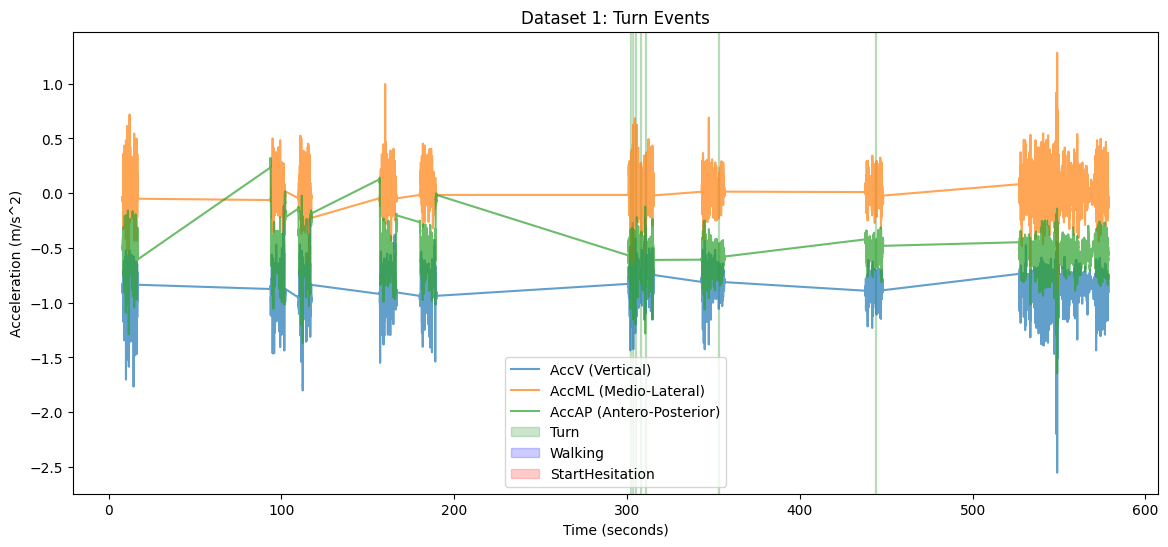

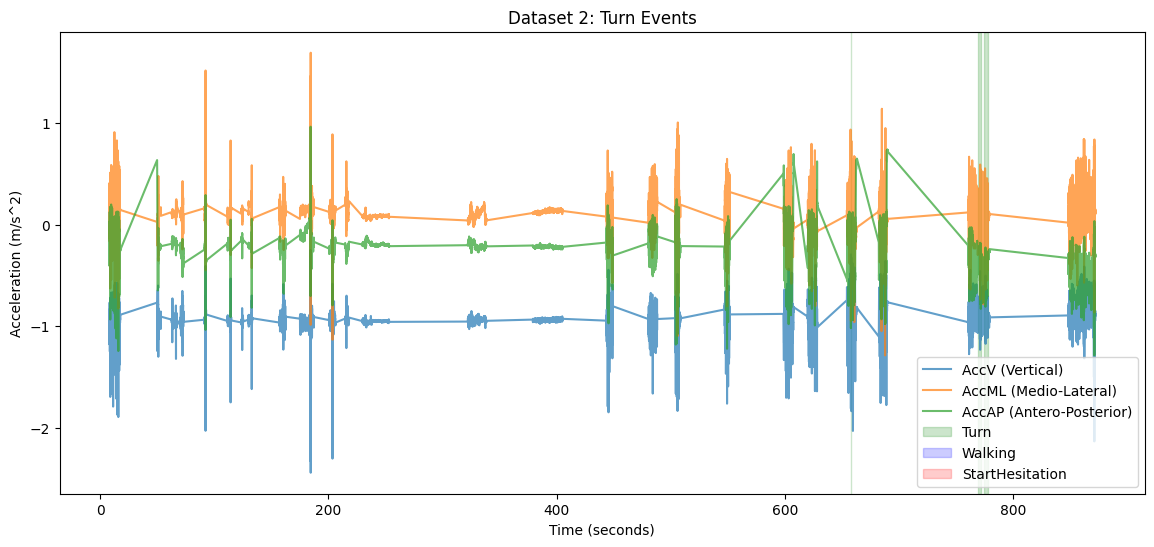

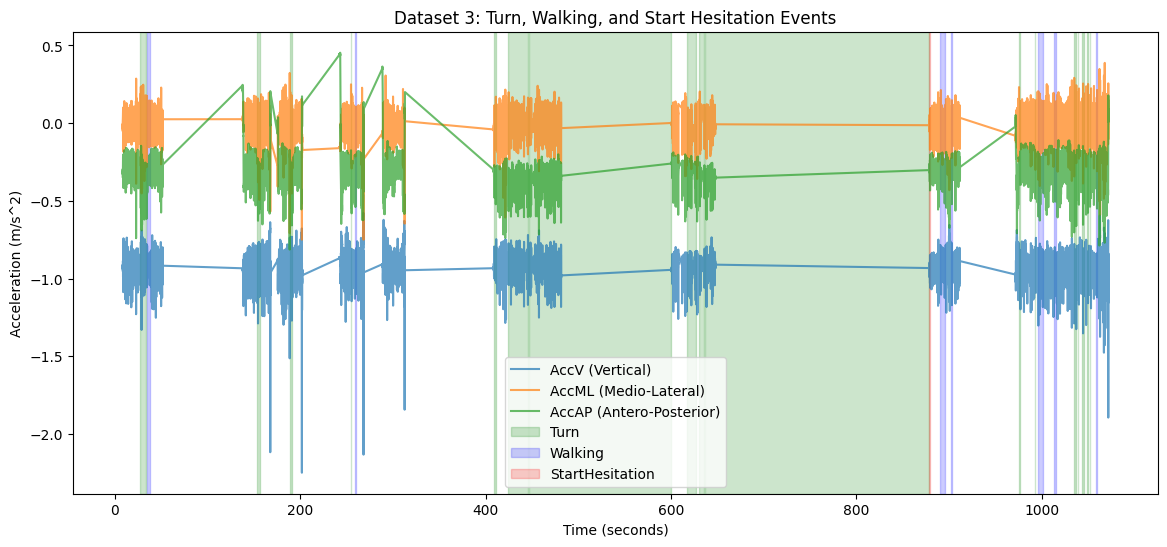

In [6]:
# 3. Plot Signals with FOG Overlay
import matplotlib.pyplot as plt

def plot_fog_events_overlay(df, title):
    """
    Plot accelerometer signals with FoG events shaded directly on the same graph.
    """
    # Convert timestamps to seconds
    df["Time_sec"] = df["Time"] / 128.0  
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot all 3 accelerometer signals
    ax.plot(df["Time_sec"], df["AccV"], label="AccV (Vertical)", alpha=0.7)
    ax.plot(df["Time_sec"], df["AccML"], label="AccML (Medio-Lateral)", alpha=0.7)
    ax.plot(df["Time_sec"], df["AccAP"], label="AccAP (Antero-Posterior)", alpha=0.7)
    
    # Define colors
    colors = {
        "Turn": "green",
        "Walking": "blue",
        "StartHesitation": "red"
    }
    
    # Shade event regions
    for event, color in colors.items():
        if event in df.columns:
            in_event = False
            start_time = None
            for t, val in zip(df["Time_sec"], df[event]):
                if val == 1 and not in_event:
                    in_event = True
                    start_time = t
                elif val == 0 and in_event:
                    in_event = False
                    ax.axvspan(start_time, t, color=color, alpha=0.2)
            if in_event:
                ax.axvspan(start_time, df["Time_sec"].iloc[-1], color=color, alpha=0.2)
    
    # Make sure each event appears once in the legend
    from matplotlib.patches import Patch
    legend_patches = [Patch(color=color, alpha=0.2, label=event) for event, color in colors.items() if event in df.columns]
    ax.legend(handles=ax.get_legend_handles_labels()[0] + legend_patches)
    
    ax.set_title(title)
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Acceleration (m/s^2)")
    plt.show()

# Example usage:
plot_fog_events_overlay(df_1, "Dataset 1: Turn Events")
plot_fog_events_overlay(df_2, "Dataset 2: Turn Events")
plot_fog_events_overlay(df_3, "Dataset 3: Turn, Walking, and Start Hesitation Events")

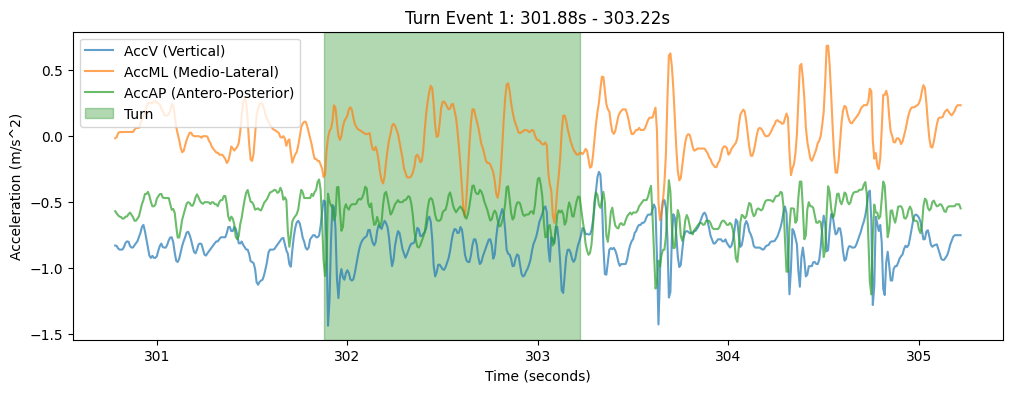

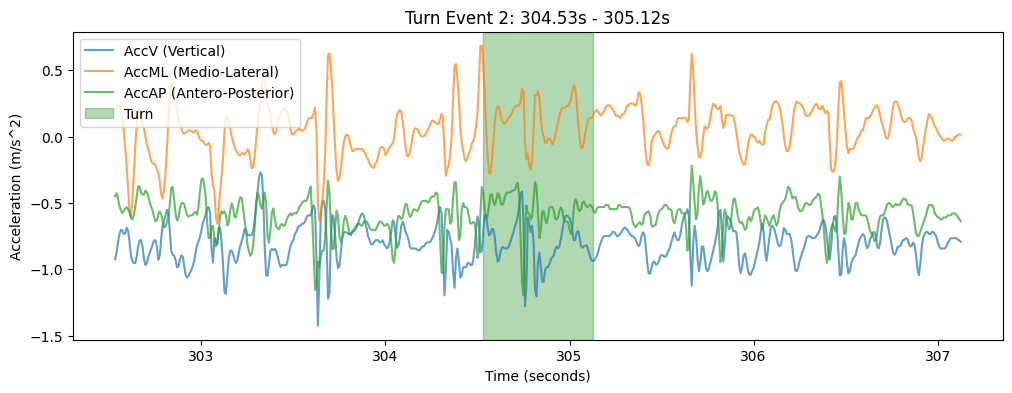

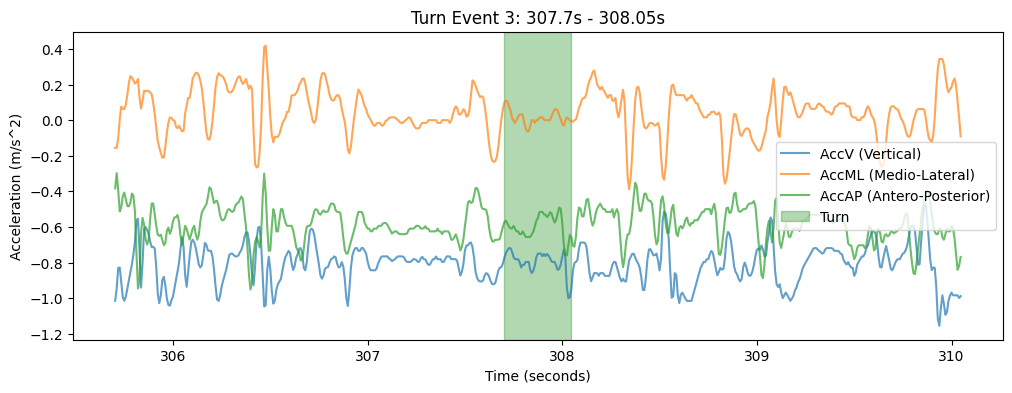

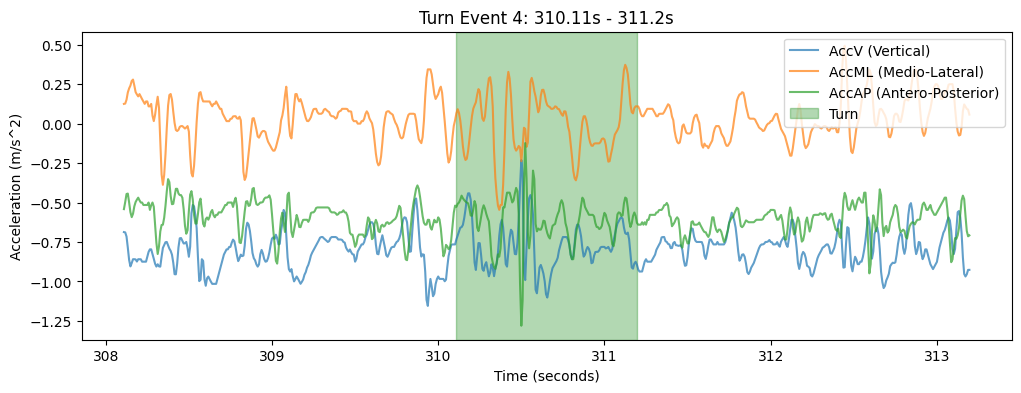

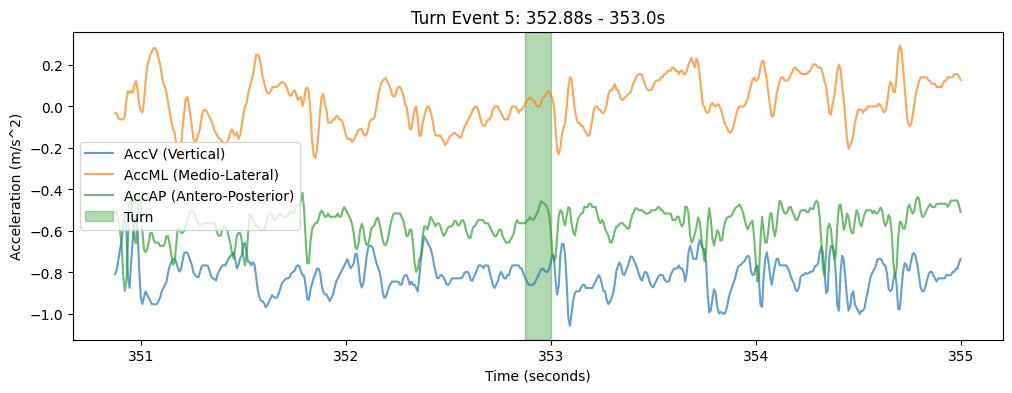

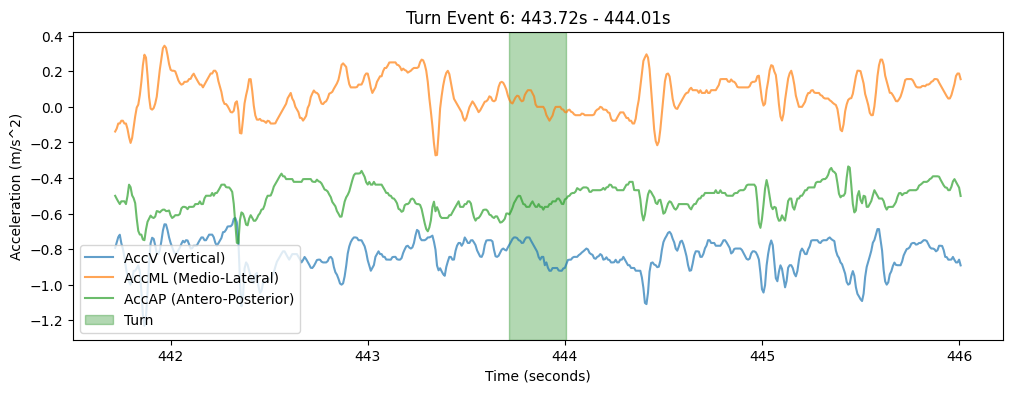

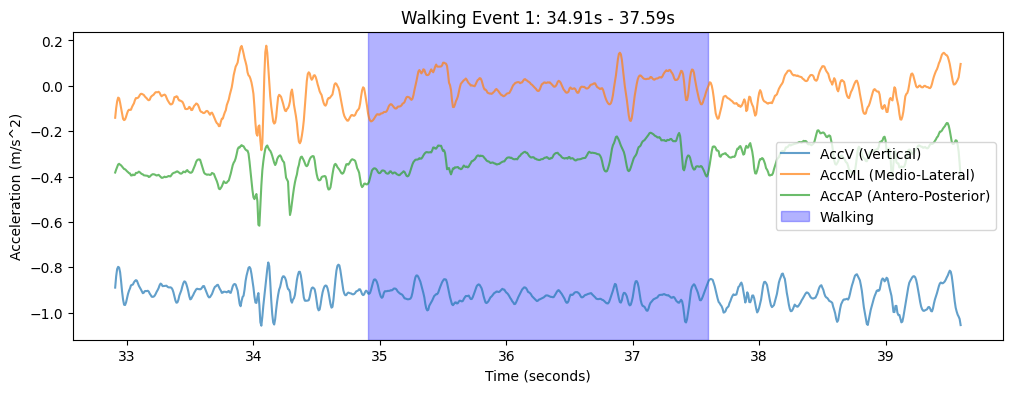

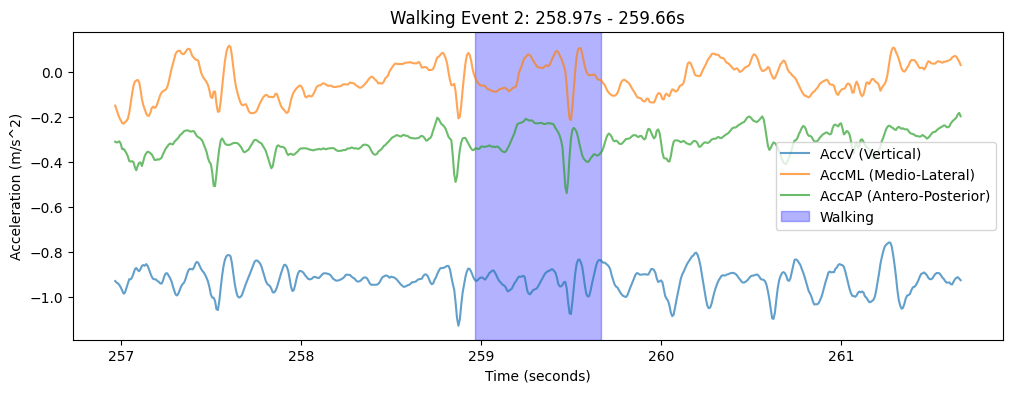

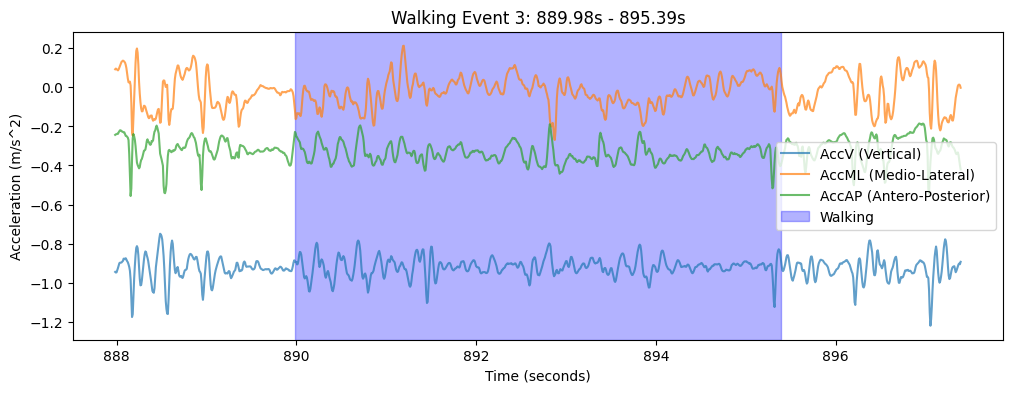

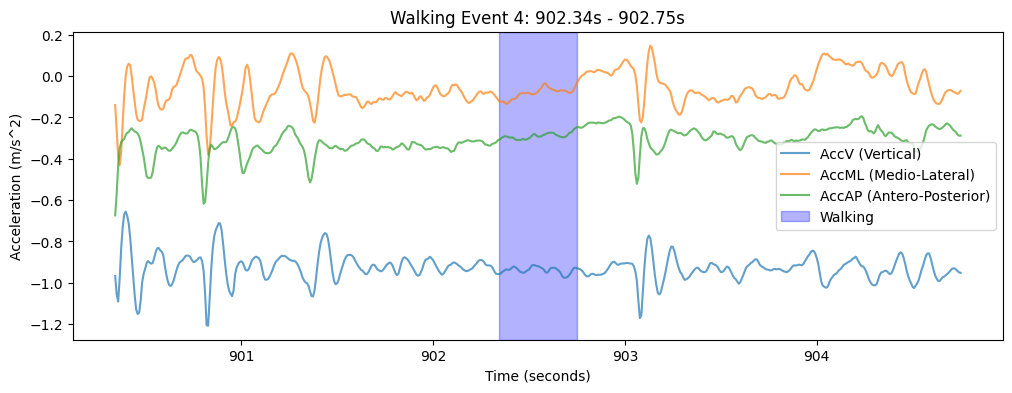

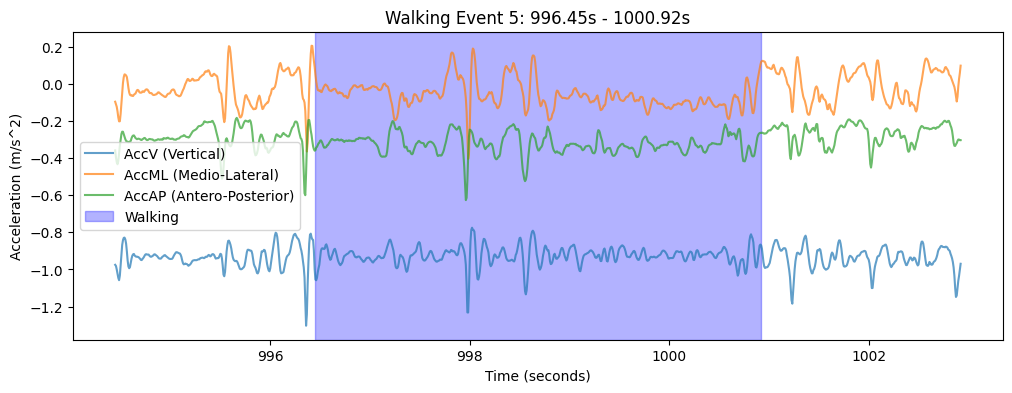

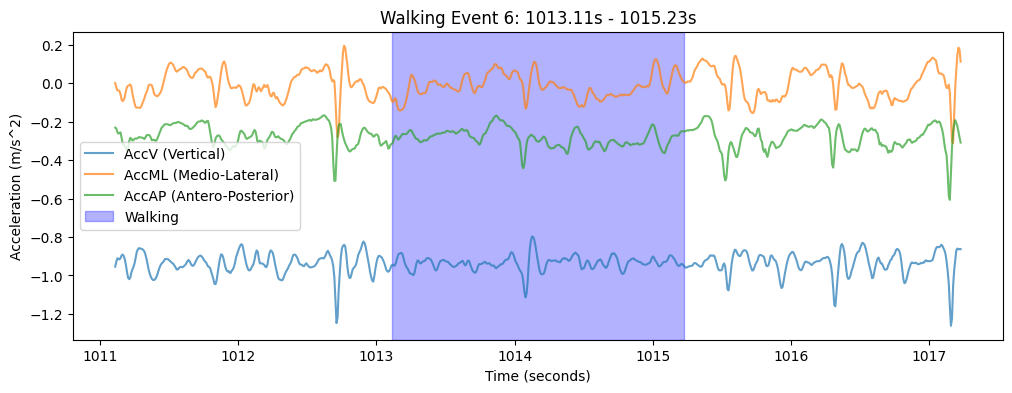

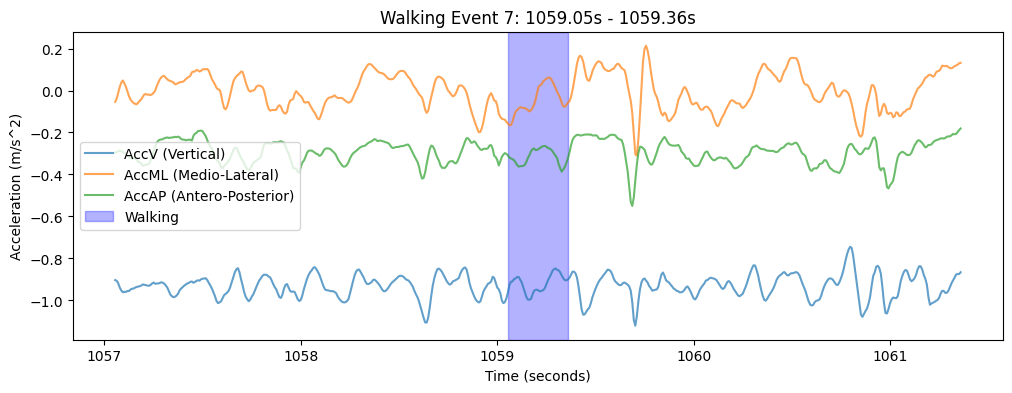

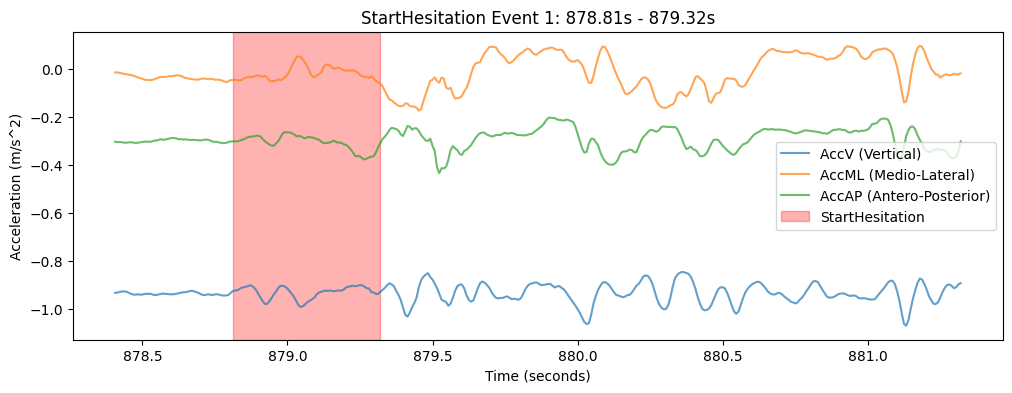

In [7]:
def plot_zoomed_fog_events(df, event="StartHesitation", margin=2, sample_rate=128):
    """
    Create zoomed-in plots around each FoG event.
    
    Parameters:
    - df: DataFrame with accelerometer signals and event columns
    - event: string, the event column to zoom in on (e.g., "StartHesitation")
    - margin: seconds before/after the event window to include
    - sample_rate: sampling rate (default 128 Hz)
    """
    df["Time_sec"] = df["Time"] / sample_rate
    
    in_event = False
    start_time = None
    event_windows = []
    
    # Find contiguous event windows
    for t, val in zip(df["Time_sec"], df[event]):
        if val == 1 and not in_event:
            in_event = True
            start_time = t
        elif val == 0 and in_event:
            in_event = False
            event_windows.append((start_time, t))
    if in_event:
        event_windows.append((start_time, df["Time_sec"].iloc[-1]))
    
    # Plot each event window
    for i, (start, end) in enumerate(event_windows, 1):
        fig, ax = plt.subplots(figsize=(12, 4))
        mask = (df["Time_sec"] >= start - margin) & (df["Time_sec"] <= end + margin)
        sub_df = df.loc[mask]
        
        ax.plot(sub_df["Time_sec"], sub_df["AccV"], label="AccV (Vertical)", alpha=0.7)
        ax.plot(sub_df["Time_sec"], sub_df["AccML"], label="AccML (Medio-Lateral)", alpha=0.7)
        ax.plot(sub_df["Time_sec"], sub_df["AccAP"], label="AccAP (Antero-Posterior)", alpha=0.7)

        if (event == "Turn"): color = "green"
        elif (event == "Walking"): color = "blue"
        else: color = "red"
        
        ax.axvspan(start, end, color=color, alpha=0.3, label=event)
        
        ax.set_title(f"{event} Event {i}: {round(start,2)}s - {round(end,2)}s")
        ax.set_xlabel("Time (seconds)")
        ax.set_ylabel("Acceleration (m/s^2)")
        ax.legend()
        plt.show()

plot_zoomed_fog_events(df_1, "Turn")
plot_zoomed_fog_events(df_3, "Walking")
plot_zoomed_fog_events(df_3)

In [8]:
import random
all_files = [os.path.join(defog_path, f) for f in os.listdir(defog_path) if f.endswith(".csv")]

# Randomly pick 50 files
sample_files = random.sample(all_files, 50)

# Load them into one DataFrame
dfs = []
for f in sample_files:
    df = pd.read_csv(f)
    df["file_id"] = os.path.basename(f)  # add file id to track source
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

print("Combined shape:", combined_df.shape)
print("Columns:", combined_df.columns)

Combined shape: (7373022, 10)
Columns: Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task', 'file_id'],
      dtype='object')


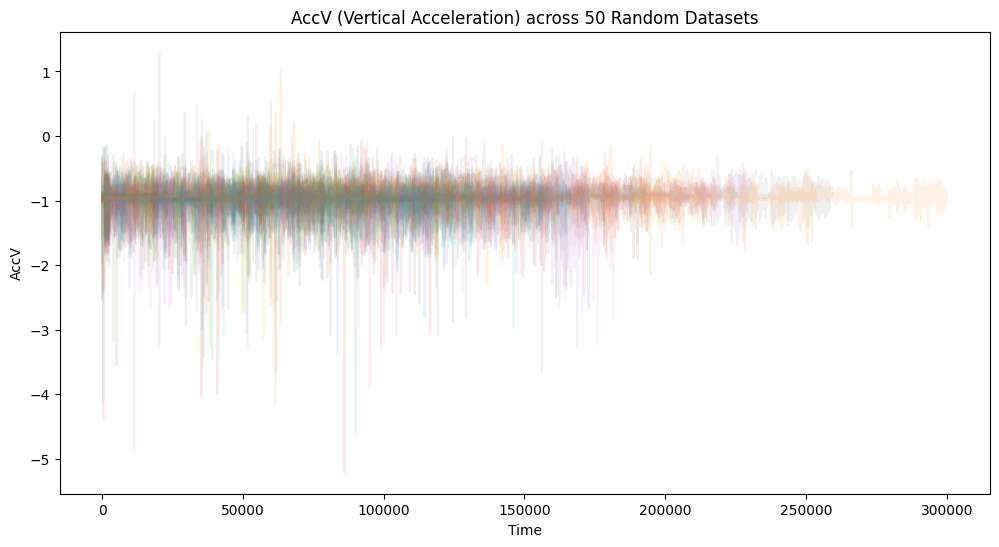

In [9]:
# Visualizations - Overlay all accelerometer signals (with transparency):
plt.figure(figsize=(12, 6))
for fid, group in combined_df.groupby("file_id"):
    plt.plot(group["Time"], group["AccV"], alpha=0.1)  # vertical acceleration
plt.title("AccV (Vertical Acceleration) across 50 Random Datasets")
plt.xlabel("Time")
plt.ylabel("AccV")
plt.show()

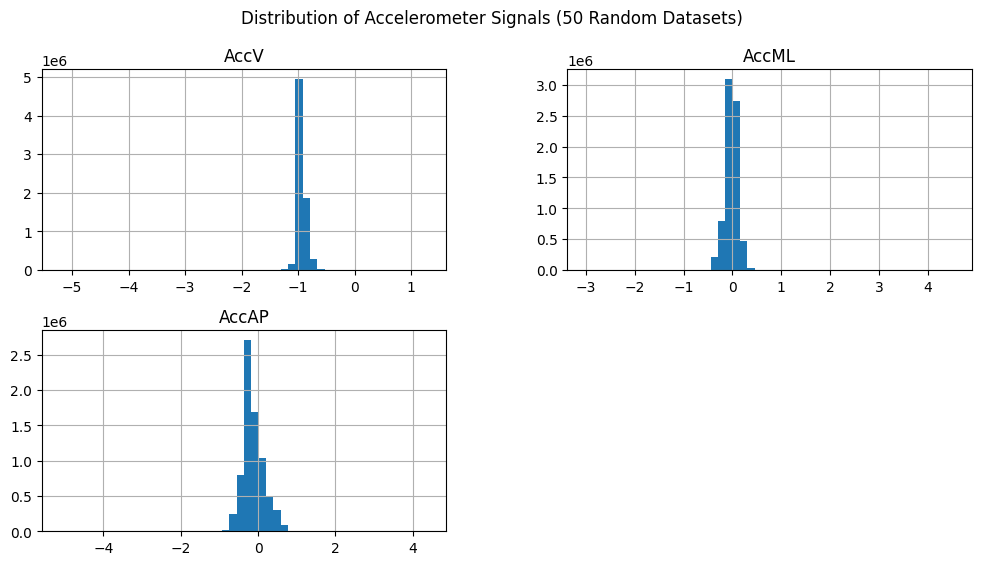

In [10]:
# Distribution of acceleration values across all datasets:

combined_df[["AccV","AccML","AccAP"]].hist(bins=50, figsize=(12,6))
plt.suptitle("Distribution of Accelerometer Signals (50 Random Datasets)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

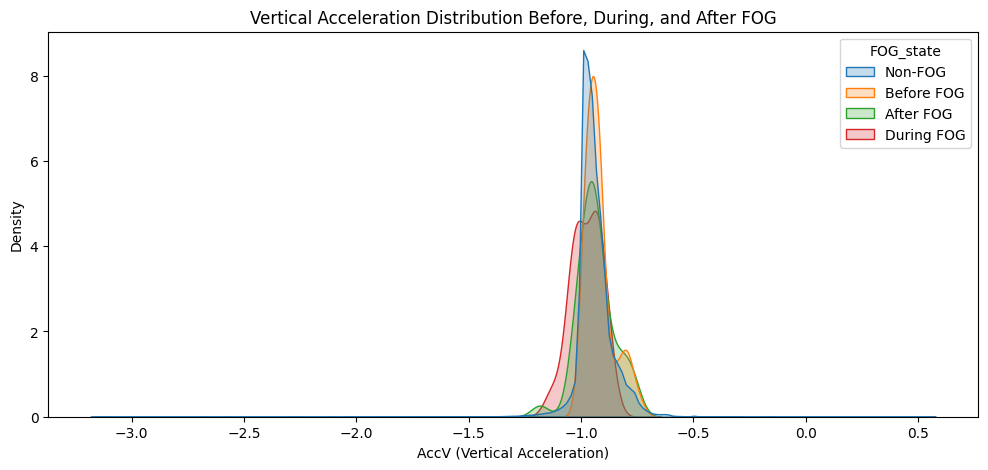

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

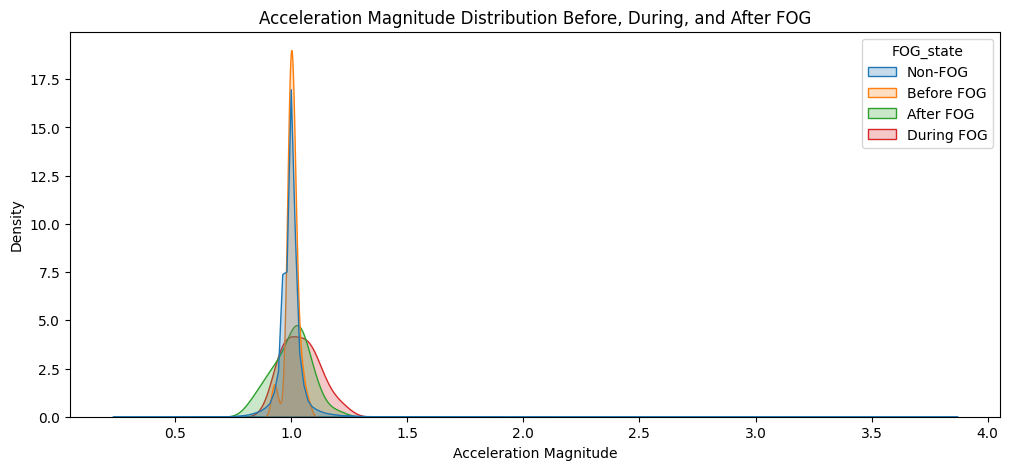

In [11]:
import seaborn as sns

# Assume StartHesitation column exists
df = combined_df.copy()
fs = 100
window = 2 * fs  # 2 seconds before/after
df["FOG_state"] = "Non-FOG"

# Identify event start and end indices
fog_mask = df["StartHesitation"] == 1
diffs = fog_mask.astype(int).diff().fillna(0)
start_idxs = diffs[diffs == 1].index
end_idxs = diffs[diffs == -1].index

# Handle edge cases
if len(end_idxs) < len(start_idxs):
    end_idxs = end_idxs.append(pd.Index([len(df)-1]))

# Mark FOG and surrounding regions
for start, end in zip(start_idxs, end_idxs):
    df.loc[start:end, "FOG_state"] = "During FOG"
    df.loc[max(0, start-window):start, "FOG_state"] = "Before FOG"
    df.loc[end:min(len(df)-1, end+window), "FOG_state"] = "After FOG"

# Optional: downsample for faster plotting
df_sample = df.sample(frac=0.05, random_state=42)  # 5% of data

# Compute magnitude
df_sample["AccMag"] = np.sqrt(
    df_sample["AccV"]**2 + df_sample["AccML"]**2 + df_sample["AccAP"]**2
)

# Plot vertical acceleration
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df_sample, x="AccV", hue="FOG_state", fill=True, common_norm=False)
plt.title("Vertical Acceleration Distribution Before, During, and After FOG")
plt.xlabel("AccV (Vertical Acceleration)")
plt.show()

# Plot magnitude
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df_sample, x="AccMag", hue="FOG_state", fill=True, common_norm=False)
plt.title("Acceleration Magnitude Distribution Before, During, and After FOG")
plt.xlabel("Acceleration Magnitude")
plt.show()

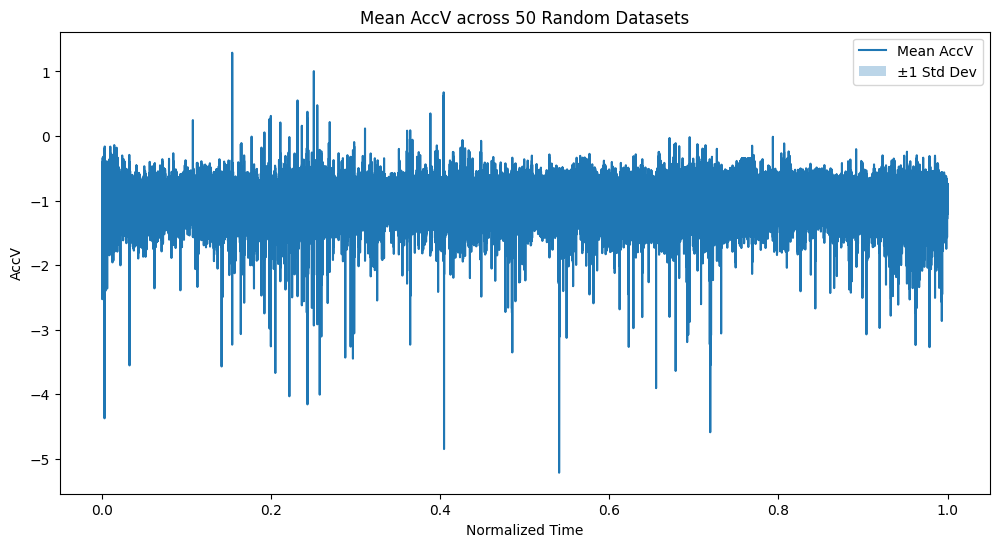

In [12]:
# Normalize time since different files have different lengths
combined_df["norm_time"] = combined_df.groupby("file_id")["Time"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

avg = combined_df.groupby("norm_time")["AccV"].mean()
std = combined_df.groupby("norm_time")["AccV"].std()

plt.figure(figsize=(12,6))
plt.plot(avg.index, avg, label="Mean AccV")
plt.fill_between(avg.index, avg-std, avg+std, alpha=0.3, label="±1 Std Dev")
plt.title("Mean AccV across 50 Random Datasets")
plt.xlabel("Normalized Time")
plt.ylabel("AccV")
plt.legend()
plt.show()

In [13]:
def plot_fog_event_windows(df, event_col, sample_n=5, window_sec=15, fs=128):
    """
    Zoom in on event windows for a given FoG event type.
    
    df: DataFrame with Time, AccV, AccML, AccAP, and event columns
    event_col: str, name of event column ("StartHesitation", "Turn", "Walking")
    sample_n: number of event windows to sample
    window_sec: seconds before/after event to plot
    fs: sampling frequency (128Hz in this dataset)
    """
    df["Time_sec"] = df["Time"] / fs
    
    # Find event start indices
    event_indices = df.index[df[event_col] == 1].tolist()
    
    if not event_indices:
        print(f"No {event_col} events in this dataset")
        return
    
    # Pick random subset of event indices
    chosen = random.sample(event_indices, min(sample_n, len(event_indices)))
    
    plt.figure(figsize=(14, 3*len(chosen)))
    
    plotted = 0
    for i, idx in enumerate(chosen, 1):
        start = max(0, idx - window_sec * fs)
        end   = min(len(df), idx + window_sec * fs)
        window = df.iloc[start:end]
        
        if window.empty:  # safety check
            continue
        
        plotted += 1
        plt.subplot(len(chosen), 1, plotted)
        plt.plot(window["Time_sec"], window["AccV"], label="AccV")
        plt.plot(window["Time_sec"], window["AccML"], label="AccML")
        plt.plot(window["Time_sec"], window["AccAP"], label="AccAP")
        
        # Highlight the actual FoG points inside window
        fog_times = window.loc[window[event_col] == 1, "Time_sec"]
        for t in fog_times:
            plt.axvline(x=t, color="red", alpha=0.02)  # vertical line at event points
        
        plt.title(f"{event_col} Event Example {plotted}")
        plt.xlabel("Time (sec)")
        plt.ylabel("Acceleration")
        if plotted == 1:
            plt.legend()
    
    if plotted == 0:
        print(f"Could not find valid {event_col} windows to plot.")
    else:
        plt.tight_layout()
        plt.show()

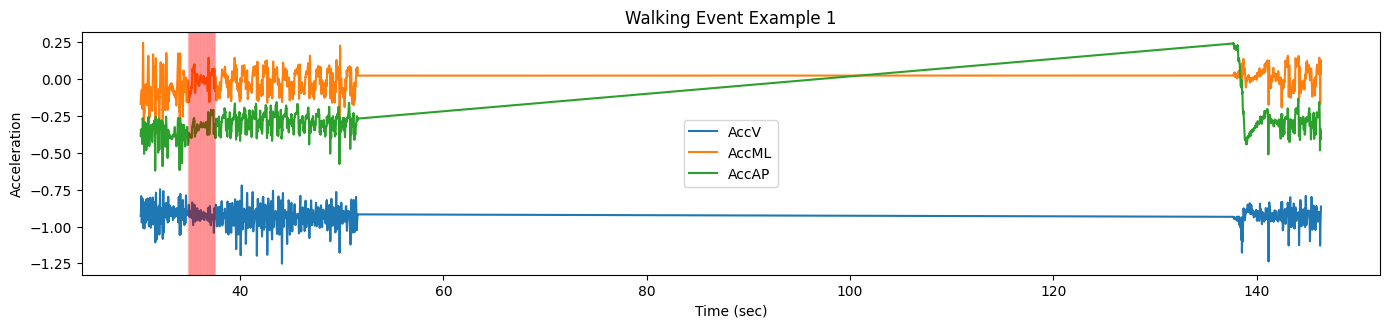

Could not find valid Turn windows to plot.


<Figure size 1400x1500 with 0 Axes>

In [14]:
plot_fog_event_windows(df_3, "Walking", sample_n=5)
plot_fog_event_windows(df_3, "Turn", sample_n=5)

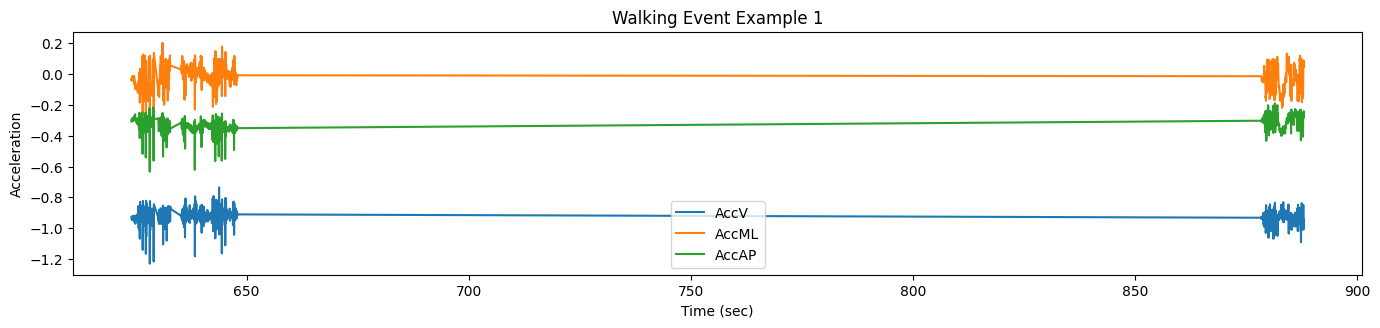

In [15]:
plot_fog_event_windows(df_3, "Walking", sample_n=5)

### Filtering: Remove Z-score Outliers

In [16]:
def remove_outliers(df, z_thresh=3):
    df = df.copy()
    for col in ['AccV', 'AccML', 'AccAP']:
        z = zscore(df[col].fillna(0))
        df.loc[np.abs(z) > z_thresh, col] = np.nan
        df[col] = df[col].interpolate().bfill().ffill()
    return df

### Plot Cleaned Spectrograms for Visualization

In [17]:
from scipy.signal import spectrogram
from scipy.stats import zscore

def plot_clean_spectrogram(df, fs=128, nperseg=512, z_thresh_signal=3, 
                           z_thresh_spec=3, freq_limit=5, title=None):
    """
    Cleans accelerometer signals by removing z-score outliers, 
    computes a magnitude-based spectrogram (0–25 Hz by default),
    and highlights frequency-time outliers on top.

    Parameters
    ----------
    df : pd.DataFrame
        Must contain 'AccV', 'AccML', and 'AccAP' columns.
    fs : int, optional
        Sampling frequency (default = 128 Hz).
    nperseg : int, optional
        Window size for the spectrogram (default = 512).
    z_thresh_signal : float, optional
        Threshold for z-score filtering of raw accelerometer signals.
    z_thresh_spec : float, optional
        Threshold for z-score filtering within the spectrogram.
    freq_limit : float, optional
        Max frequency (Hz) to display (default = 25 Hz).
    title : str, optional
        Custom title for the plot.
    """

    df = remove_outliers(df)

    # --- 2️⃣ Compute combined acceleration magnitude ---
    acc_mag = np.sqrt(df['AccV']**2 + df['AccML']**2 + df['AccAP']**2)
    acc_mag -= np.mean(acc_mag)  # remove DC offset

    # --- 3️⃣ Compute spectrogram ---
    f, t, Sxx = spectrogram(acc_mag, fs=fs, nperseg=nperseg)
    Sxx_db = 10 * np.log10(Sxx + 1e-12)  # power in dB

    # --- 4️⃣ Limit to meaningful frequencies (0–freq_limit Hz) ---
    freq_mask = f <= freq_limit
    f = f[freq_mask]
    Sxx_db = Sxx_db[freq_mask, :]

    # --- 5️⃣ Detect spectrogram outliers ---
    z_scores = zscore(Sxx_db.flatten())
    z_scores_reshaped = z_scores.reshape(Sxx_db.shape)
    outlier_mask = np.abs(z_scores_reshaped) > z_thresh_spec

    # --- 6️⃣ Plot the spectrogram ---
    plt.figure(figsize=(12, 5))
    plt.pcolormesh(t, f, Sxx_db, shading='gouraud', cmap='viridis')
    plt.colorbar(label='Power (dB)')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title(title or f"Cleaned Spectrogram (0–{freq_limit} Hz) with Z-Score Outliers")

    # Overlay outliers
    outlier_t, outlier_f = np.meshgrid(t, f)
    plt.scatter(outlier_t[outlier_mask], outlier_f[outlier_mask],
                color='red', s=5, label='Outliers', alpha=0.6)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    return {
        'frequencies': f,
        'times': t,
        'spectrogram_db': Sxx_db,
        'z_scores': z_scores_reshaped,
        'outlier_mask': outlier_mask
    }


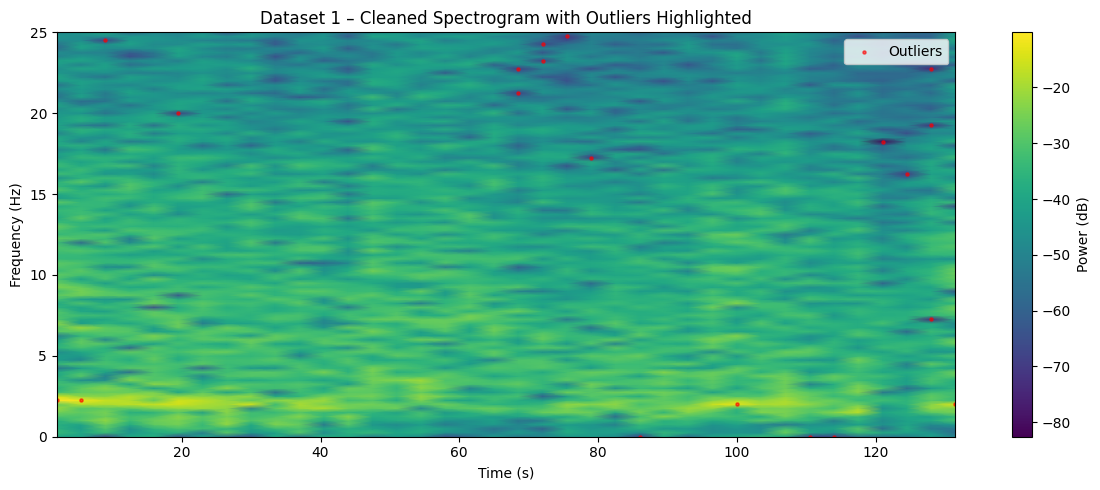

{'frequencies': array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
         6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
         9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
        11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
        13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
        15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
        18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
        20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
        22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
        24.75, 25.  ]),
 'times': array([  2. ,   5.5,   9. ,  12.5,  16. ,  19.5,  23. ,  26.5,  30. ,
         33.5,  37. ,  40.5,  44. ,  47.5,  51. ,  54.5,  58. ,  61.5,
         65. ,  68.5,  72. , 

In [18]:
plot_clean_spectrogram(df_1, fs=128, nperseg=512, 
                       z_thresh_signal=3, z_thresh_spec=3, 
                       freq_limit=25, 
                       title="Dataset 1 – Cleaned Spectrogram with Outliers Highlighted")

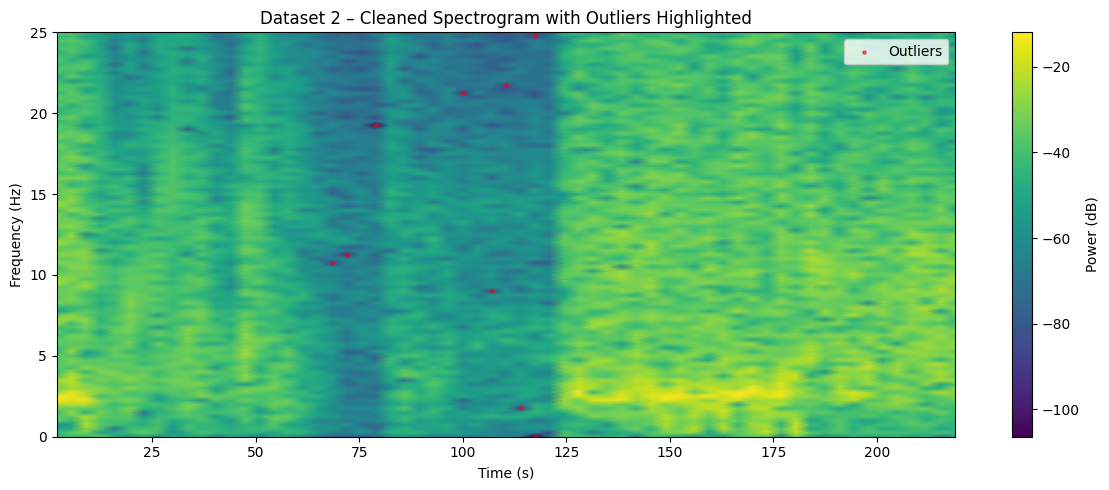

{'frequencies': array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
         6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
         9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
        11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
        13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
        15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
        18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
        20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
        22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
        24.75, 25.  ]),
 'times': array([  2. ,   5.5,   9. ,  12.5,  16. ,  19.5,  23. ,  26.5,  30. ,
         33.5,  37. ,  40.5,  44. ,  47.5,  51. ,  54.5,  58. ,  61.5,
         65. ,  68.5,  72. , 

In [19]:
plot_clean_spectrogram(df_2, fs=128, nperseg=512, 
                       z_thresh_signal=3, z_thresh_spec=3, 
                       freq_limit=25, 
                       title="Dataset 2 – Cleaned Spectrogram with Outliers Highlighted")

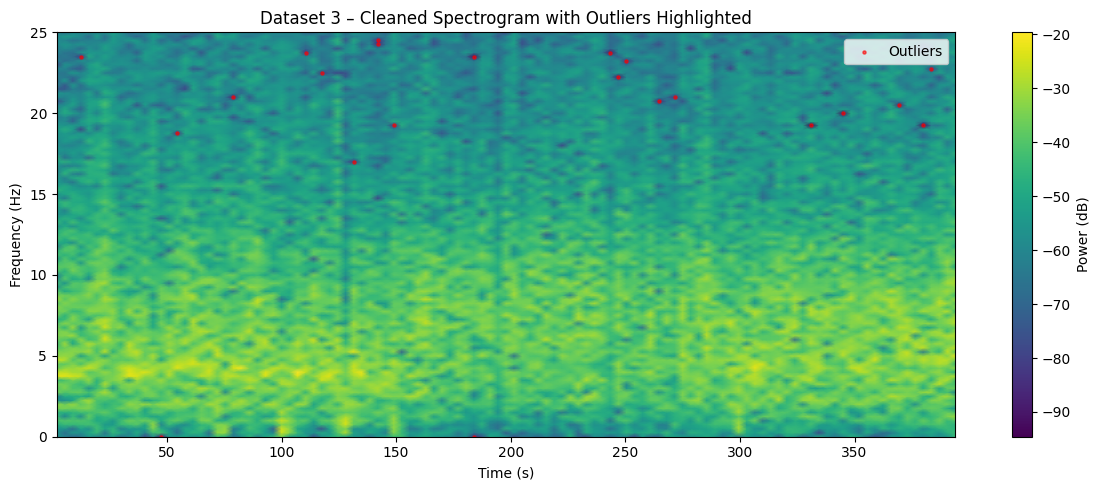

{'frequencies': array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
         6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
         9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
        11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
        13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
        15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
        18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
        20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
        22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
        24.75, 25.  ]),
 'times': array([  2. ,   5.5,   9. ,  12.5,  16. ,  19.5,  23. ,  26.5,  30. ,
         33.5,  37. ,  40.5,  44. ,  47.5,  51. ,  54.5,  58. ,  61.5,
         65. ,  68.5,  72. , 

In [20]:
plot_clean_spectrogram(df_3, fs=128, nperseg=512, 
                       z_thresh_signal=3, z_thresh_spec=3, 
                       freq_limit=25, 
                       title="Dataset 3 – Cleaned Spectrogram with Outliers Highlighted")

### More Data Cleaning

Remove gravity and very low drift (high-pass filter). Gravity sits around 0 Hz, so we use a high-pass Butterworth filter to remove slow components below ~0.5 Hz.

In [21]:
from scipy.signal import butter, filtfilt

df_clean = remove_outliers(df_3)

def butter_highpass_filter(data, cutoff=0.5, fs=128, order=4):
    b, a = butter(order, cutoff / (0.5 * fs), btype='high')
    return filtfilt(b, a, data)

for col in ['AccV', 'AccML', 'AccAP']:
    df_clean[col] = butter_highpass_filter(df_clean[col], cutoff=0.5, fs=128)

Smooth out sensor jitter (Savitzky-Golay filter). This removes small random noise and preserves genuine movement patterns.

In [22]:
from scipy.signal import savgol_filter

for col in ['AccV', 'AccML', 'AccAP']:
    df_clean[col] = savgol_filter(df_clean[col], window_length=21, polyorder=3)

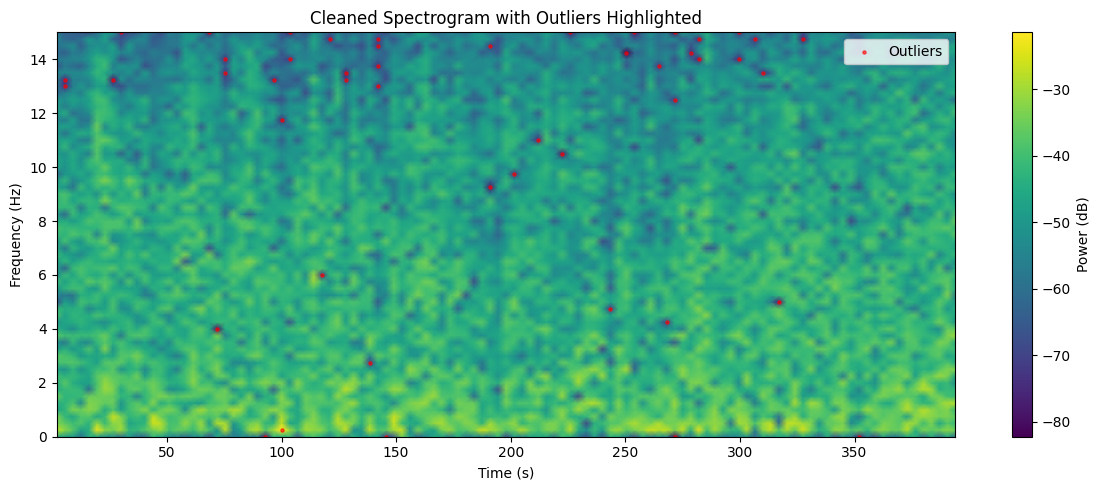

{'frequencies': array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
         6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
         9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
        11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
        13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  ]),
 'times': array([  2. ,   5.5,   9. ,  12.5,  16. ,  19.5,  23. ,  26.5,  30. ,
         33.5,  37. ,  40.5,  44. ,  47.5,  51. ,  54.5,  58. ,  61.5,
         65. ,  68.5,  72. ,  75.5,  79. ,  82.5,  86. ,  89.5,  93. ,
         96.5, 100. , 103.5, 107. , 110.5, 114. , 117.5, 121. , 124.5,
        128. , 131.5, 135. , 138.5, 142. , 145.5, 149. , 152.5, 156. ,
        159.5, 163. , 166.5, 170. , 173.5, 177. , 180.5, 184. , 187.5,
        191. , 194.5, 198. , 201.5, 205. , 208.5, 212. , 215.5, 2

In [23]:
plot_clean_spectrogram(df_clean, fs=128, nperseg=512, 
                       z_thresh_signal=3, z_thresh_spec=3, 
                       freq_limit=15, 
                       title="Cleaned Spectrogram with Outliers Highlighted")

In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


def train_multilabel_nn(df, test_size=0.2, epochs=10, batch_size=32):
    """
    Train and evaluate a simple neural network for multi-label FoG event detection.
    
    Predicts three binary labels: StartHesitation, Turn, Walking.
    """
    # --- Prepare features and labels ---
    feature_cols = ['AccV', 'AccML', 'AccAP']
    target_cols = ['StartHesitation', 'Turn', 'Walking']

    X = df[feature_cols].values
    y = df[target_cols].values

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    
    # --- Build NN model ---
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(3, activation='sigmoid')
    ])

    # --- Compile ---
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',  # works for multi-label
        metrics=['accuracy']
    )

    # --- Train ---
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

     # --- Evaluate ---
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Accuracy per label
    print("\nPer-Label Accuracy:")
    for i, label in enumerate(target_cols):
        acc = accuracy_score(y_test[:, i], y_pred[:, i])
        print(f"{label}: {acc:.3f}")

    # --- Confusion Matrices ---
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for i, label in enumerate(target_cols):
        cm = confusion_matrix(y_test[:, i], y_pred[:, i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f"{label} Confusion Matrix")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("True")
    plt.tight_layout()
    plt.show()

    return model, history, X_train, X_test, y_train, y_test, y_pred

2025-11-25 20:09:33.209398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764101373.413143      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764101373.467710      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
print(df_clean[['StartHesitation','Turn','Walking']].sum())

StartHesitation       65
Turn               12917
Walking             2060
dtype: int64


Epoch 1/10


2025-11-25 20:09:48.229302: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1021/1021 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2283 - loss: 0.4375 - val_accuracy: 0.2535 - val_loss: 0.2294
Epoch 2/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2545 - loss: 0.2298 - val_accuracy: 0.2534 - val_loss: 0.2238
Epoch 3/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2527 - loss: 0.2288 - val_accuracy: 0.2535 - val_loss: 0.2214
Epoch 4/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2520 - loss: 0.2264 - val_accuracy: 0.2531 - val_loss: 0.2207
Epoch 5/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2495 - loss: 0.2227 - val_accuracy: 0.2535 - val_loss: 0.2198
Epoch 6/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2514 - loss: 0.2239 - val_accuracy: 0.2531 - val_loss: 0.2196
Epoch 7/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2520 - loss: 0.2225 - val_accuracy: 0.2535 - val_loss: 0.2190
Epoch 8/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2486 - loss: 0.2217 - val_accurac

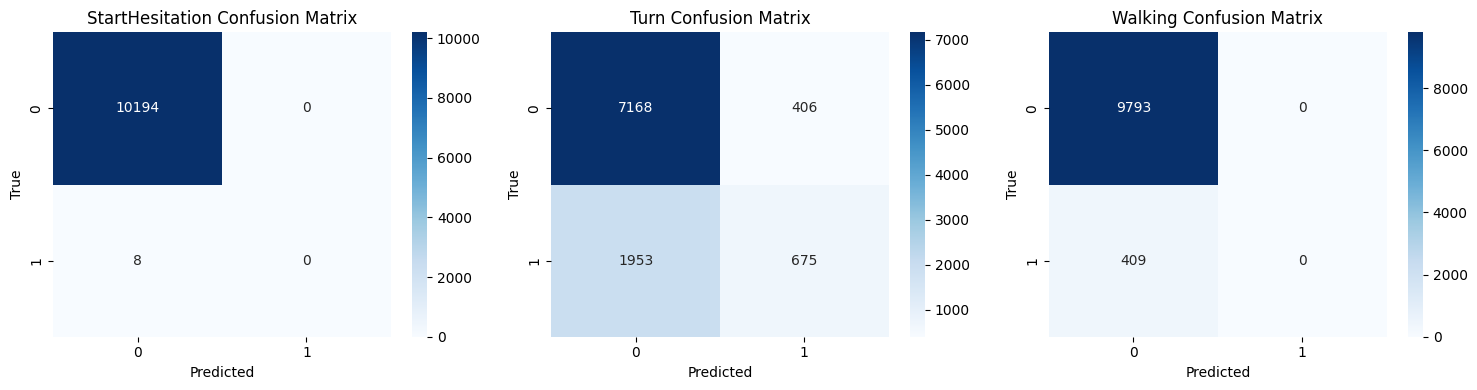

In [26]:
model, history, X_train, X_test, y_train, y_test, y_pred = train_multilabel_nn(df_clean, epochs=10)

In [27]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


(300, 3, 3)


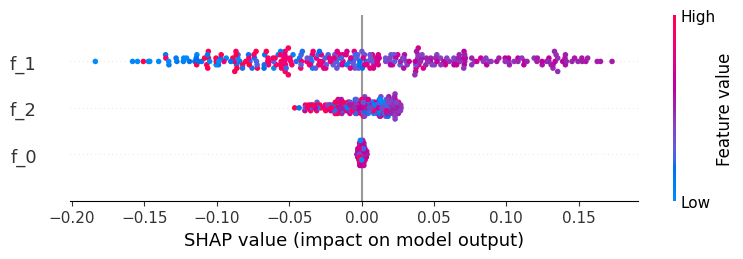

In [28]:
import shap 

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

background_size = min(200, X_train.shape[0]) 
background_indices = np.random.choice(X_train.shape[0], background_size, replace=False) 
background = X_train[background_indices]

# subset of test data to explain 
test_sample_size = min(300, X_test.shape[0]) 
X_test_sample = X_test[:test_sample_size]
y_test_sample = y_test[:test_sample_size] 
y_pred_sample = y_pred[:test_sample_size] 

# create DeepExplainer 
explainer = shap.Explainer(model, background)
shap_exp = explainer(X_test_sample)   # returns a shap.Explanation object


# for multi-class, shap_exp.values has shape (n_samples, n_classes, n_features)
print(shap_exp.values.shape)

n_features = X_train.shape[1]
feature_names = feature_names = [f"f_{i}" for i in range(n_features)]

# summary for, say, class 1:
shap.summary_plot(
    shap_exp.values[:, 1, :],
    X_test_sample,
    feature_names=feature_names
)